In [1]:
# Tokenize the data
# remove punctuations
# remove numbers

In [59]:
import pandas as pd
import numpy as np
import time
import os
import random
import gensim
import multiprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from gensim.models import Word2Vec

In [53]:
cores = multiprocessing.cpu_count()
cores

12

In [54]:
os.listdir(os.path.join(os.getcwd(), 'data-labeled'))

['CryptoRobinhooders_chat_data_clean__.xlsx',
 'Satoshi_club_chat_data_clean__.xlsx',
 'combined-super-clean-data.xlsx',
 'telegram_data_8th_NOV.csv',
 'telegram-clean-data.xlsx',
 '.ipynb_checkpoints',
 'desktop.ini']

In [55]:
df = pd.read_excel('data-labeled/combined-super-clean-data.xlsx')

In [56]:
df.tail(2)

,raw_data,clean,label
11868,Most of users are still not aware with Blockch...,most of users are still not aware with blockch...,other
11869,What are the attractive features in your proje...,what are the attractive features in your proje...,other


#### '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
rand = random.randint(0, 11926)
df.loc[rand, 'raw_data'], df.loc[rand, 'clean']

('Guys is cross swap legit ? I see no communication there ?',
 'guys is cross swap legit  i see no communication there ')

In [64]:
df['split'] = df['clean'].str.split()
df.tail()

,raw_data,clean,label,split
11865,Do you have an ambassador program available? I...,do you have an ambassador program available if...,other,"[do, you, have, an, ambassador, program, avail..."
11866,COVID 19 has slowed many economies around the ...,covid has slowed many economies around the wo...,other,"[covid, has, slowed, many, economies, around, ..."
11867,Are you planning to promote your project in co...,are you planning to promote your project in co...,other,"[are, you, planning, to, promote, your, projec..."
11868,Most of users are still not aware with Blockch...,most of users are still not aware with blockch...,other,"[most, of, users, are, still, not, aware, with..."
11869,What are the attractive features in your proje...,what are the attractive features in your proje...,other,"[what, are, the, attractive, features, in, you..."


In [184]:
t1 = time.time()
no_of_epochs = 5000

model = gensim.models.Word2Vec(
    sentences=df['split'], 
    vector_size=100,
    window=5, 
    min_count=3, 
    max_vocab_size=None, 
    seed=1, 
    workers=cores-1, 
    epochs=no_of_epochs, 
    batch_words=10000,
    shrink_windows=True
)

# Saving the model for later use
model.save(f'model-assets/word-to-vec-model-{str(no_of_epochs)}-epochs.bin')

print('Total time taken: ', time.time() - t1, ' seconds')

Total time taken:  295.9433481693268  seconds


In [172]:
# Loading the saved gensim.models.word2vec.Word2Vec model

# model2 = Word2Vec.load(f'model-assets/word-to-vec-model-{str(no_of_epochs)}-epochs.bin')

In [213]:
word = random.choice(model.wv.index_to_key)
print('>>> ', word)
model.wv.most_similar(word)

>>>  shop


[('delays', 0.3866698741912842),
 ('needs', 0.3258574903011322),
 ('proud', 0.325517475605011),
 ('format', 0.31522902846336365),
 ('reflections', 0.3101250231266022),
 ('waterfall', 0.3100389838218689),
 ('sphynx', 0.3076106011867523),
 ('started', 0.30560123920440674),
 ('region', 0.3024366796016693),
 ('ix', 0.3022557497024536)]

In [ ]:
model.wv.vectors.shape, model.wv.vectors

((10237, 300),
 array([[-0.19352786,  0.13082226, -1.2502435 , ..., -1.027847  ,
          0.45892674, -2.2834935 ],
        [ 0.9679163 ,  0.2710122 , -0.77182305, ...,  1.2150706 ,
          2.7434988 , -0.82837826],
        [ 0.9454165 ,  0.94251513, -2.4841201 , ...,  1.2761592 ,
          0.60368425, -1.7130086 ],
        ...,
        [-0.14473581, -0.06989015, -0.08948798, ..., -0.45702127,
          0.42149937,  0.13829957],
        [-0.34807694, -0.16060251,  0.21657258, ..., -0.68468654,
         -0.03492728,  0.7847276 ],
        [ 0.21181831, -1.5025665 ,  0.11914018, ...,  0.5910685 ,
         -0.48914686,  1.000466  ]], dtype=float32))

In [50]:
vectors = np.asarray(model.wv.vectors)
labels = np.asarray(model.wv.index_to_key)

/opt/miniconda3/envs/tele/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/miniconda3/envs/tele/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


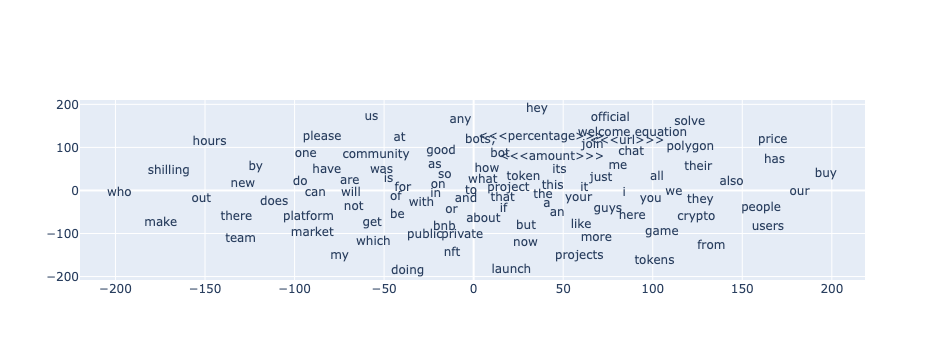

In [51]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors[:100])
    labels = np.asarray(model.wv.index_to_key[:100])  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)
